In [1]:
import pandas as pd
import ML_ToolBox as tb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, make_scorer, precision_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier


In [2]:
df = pd.read_csv("./data/titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()
df.drop("Name", axis= 1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#mapping = {'yes': 1, 'no': 0}
#df['alive'] = df['alive'].map(mapping)

In [6]:
tb.describe_df(df)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Data_Type,int64,int64,int64,object,float64,int64,int64,object,float64,object,object
Missings(%),0.0,0.0,0.0,0.0,19.87,0.0,0.0,0.0,0.0,77.1,0.22
Unique_Values,891,2,3,2,88,7,7,681,248,147,3
Card(%),100.0,0.22,0.34,0.22,9.88,0.79,0.79,76.43,27.83,16.5,0.34


In [7]:
df["Age"].fillna(df["Age"].mean(), inplace = True)

In [8]:
df["Embarked"].fillna(df["Embarked"].mode(), inplace = True)

In [9]:
df.drop("Cabin", axis = 1, inplace = True)

In [10]:
target = "Survived"

In [11]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

In [12]:
train_set.drop("PassengerId", axis = 1, inplace= True)
test_set.drop("PassengerId", axis = 1, inplace= True)

In [13]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C


In [14]:
tb.get_features_num_classification(df, target)

['Pclass', 'Age', 'Parch', 'Fare']

<Figure size 1500x500 with 0 Axes>

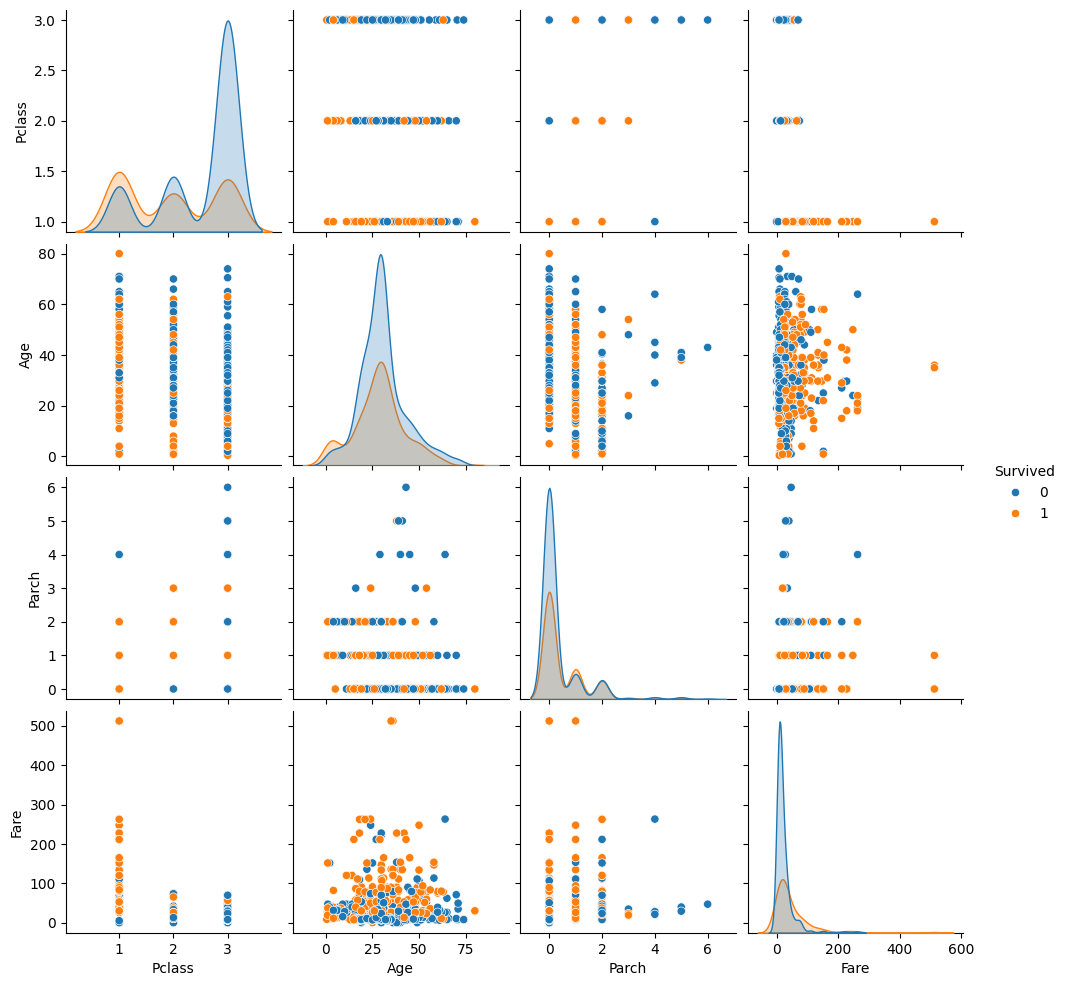

['Pclass', 'Age', 'Parch', 'Fare']

In [15]:
tb.plot_features_num_classification(df, target)

In [16]:
tb.get_features_cat_classification(df, target)

['Sex', 'Ticket', 'Embarked']

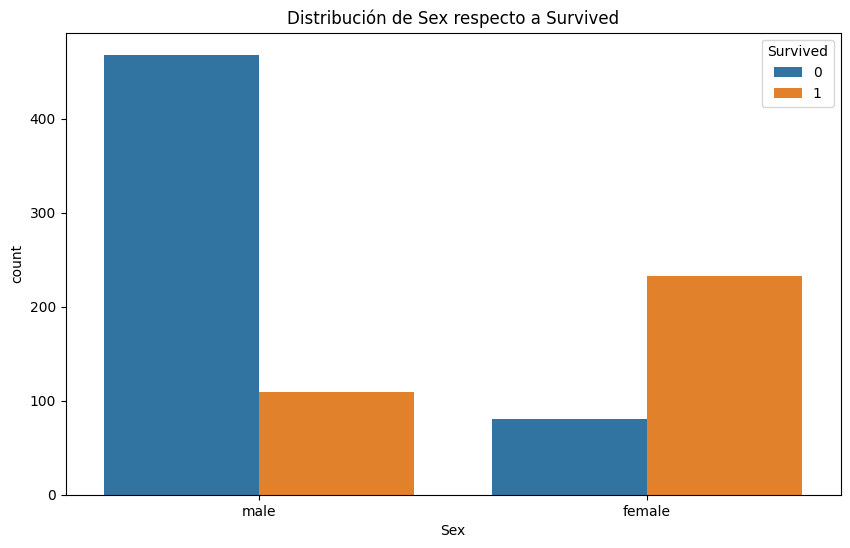

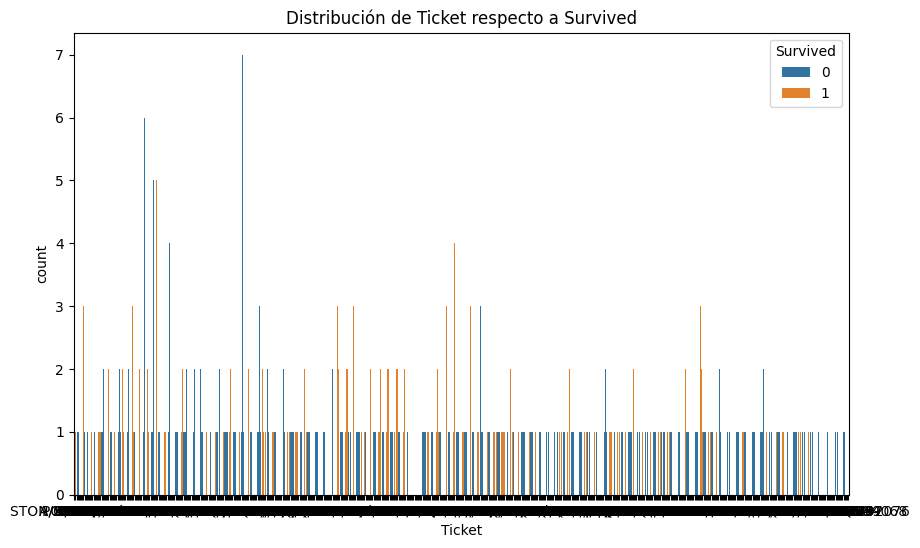

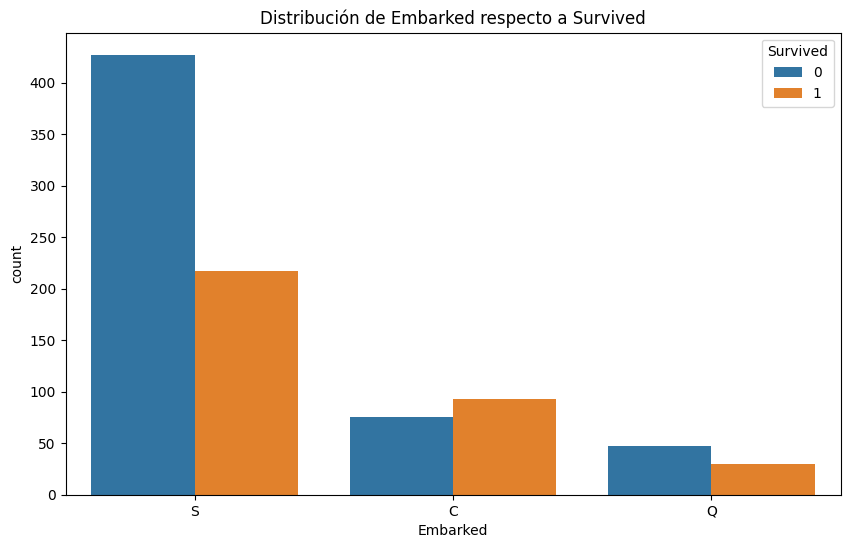

In [17]:
tb.plot_features_cat_classification(df, target)

In [18]:
tb.super_selector(df, target, selectores=  {
        "KBest": 5,
        "FromModel": [RandomForestClassifier(), 5],
        "RFE": [LogisticRegression(), 5, 1],
        "SFS": [RandomForestClassifier(), 3]
    })

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

{'KBest': ['Pclass', 'Sex', 'Ticket', 'Fare', 'Embarked'],
 'FromModel': ['PassengerId', 'Sex', 'Age', 'Ticket', 'Fare'],
 'RFE': ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'],
 'SFS': ['Pclass', 'Sex', 'SibSp'],
 'hard_voting': ['Pclass',
  'Sex',
  'Ticket',
  'Fare',
  'Embarked',
  'PassengerId',
  'Age',
  'SibSp',
  'Parch']}

In [26]:
features =  ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'] # las del RFE

In [27]:
X_train = train_set.drop(target, axis = 1)
X_test = test_set.drop(target, axis = 1)
y_train = train_set[target]
y_test = test_set[target]

In [28]:
X_train = X_train[features]
X_test = X_test[features]

In [29]:
X_train_scal = pd.get_dummies(X_train)
X_test_scal = pd.get_dummies(X_test)

In [30]:
from sklearn.metrics import accuracy_score


modelo_cb = CatBoostClassifier(iterations=100, random_state=42)
modelo_cb.fit(X_train_scal, y_train, cat_features=None)

# Predecir sobre el conjunto de prueba
predicciones_cb = modelo_cb.predict(X_test_scal)

# Calcular la precisión del modelo
precision_cb = accuracy_score(y_test, predicciones_cb)
print("Precisión del modelo CatBoost:", precision_cb)

Learning rate set to 0.073611
0:	learn: 0.6697527	total: 569us	remaining: 56.4ms
1:	learn: 0.6442455	total: 872us	remaining: 42.7ms
2:	learn: 0.6260806	total: 1.13ms	remaining: 36.5ms
3:	learn: 0.6074130	total: 1.53ms	remaining: 36.7ms
4:	learn: 0.5911547	total: 1.94ms	remaining: 36.9ms
5:	learn: 0.5761007	total: 2.38ms	remaining: 37.3ms
6:	learn: 0.5621444	total: 2.79ms	remaining: 37.1ms
7:	learn: 0.5494331	total: 3.07ms	remaining: 35.3ms
8:	learn: 0.5378913	total: 3.4ms	remaining: 34.4ms
9:	learn: 0.5277471	total: 3.77ms	remaining: 34ms
10:	learn: 0.5183181	total: 4.16ms	remaining: 33.6ms
11:	learn: 0.5111976	total: 4.58ms	remaining: 33.6ms
12:	learn: 0.5038231	total: 4.97ms	remaining: 33.2ms
13:	learn: 0.4971798	total: 5.33ms	remaining: 32.8ms
14:	learn: 0.4918716	total: 5.64ms	remaining: 32ms
15:	learn: 0.4859705	total: 5.98ms	remaining: 31.4ms
16:	learn: 0.4806355	total: 6.35ms	remaining: 31ms
17:	learn: 0.4758441	total: 6.69ms	remaining: 30.5ms
18:	learn: 0.4715940	total: 7.02ms	

In [31]:
report = classification_report(y_test, predicciones_cb)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179



In [32]:
tb.eval_model(target=y_test,predictions=predicciones_cb,problem_type="classification",metrics=["ACCURACY","MATRIX","PRECISION","RECALL","CLASS_REPORT","MATRIX_RECALL","MATRIX_PRED"])

Problema de clasificación
Accuracy: 0.7988826815642458
Confusion Matrix:
[[95 10]
 [26 48]]
Precision: 0.8063550869193503
Recall: 0.7767052767052767
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179

Confusion Matrix (Normalized by Recall):
[[0.9047619  0.0952381 ]
 [0.35135135 0.64864865]]
Confusion Matrix (Normalized by Predictions):
[[0.78512397 0.17241379]
 [0.21487603 0.82758621]]


(0.7988826815642458, 0.8063550869193503, 0.7767052767052767)